In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/content/drive/MyDrive/computation/Stars.xlsx')

In [5]:
df

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_type,Star_category,Star_color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Trying to find if there is any NaN values

In [7]:
df.isna().sum()

Temperature           0
Luminosity            0
Radius                0
Absolute_magnitude    0
Star_type             0
Star_category         0
Star_color            0
Spectral_Class        0
dtype: int64

**Here I am encoding the categorical variables into integers**

In [8]:
sp_cls = LabelEncoder()

In [9]:
df['cls'] = sp_cls.fit_transform(df['Spectral_Class'])

In [10]:
df

,Temperature,Luminosity,Radius,Absolute_magnitude,Star_type,Star_category,Star_color,Spectral_Class,cls
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M,5
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M,5
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M,5
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M,5
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M,5
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O,6
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O,6
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A,0
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A,0


In [11]:
df[['Spectral_Class','cls']].value_counts()

Spectral_Class  cls
M               5      111
B               1       46
O               6       40
A               0       19
F               2       17
K               4        6
G               3        1
dtype: int64

In [12]:
color = LabelEncoder()
catergory = LabelEncoder()

In [13]:
df['color'] = sp_cls.fit_transform(df['Star_color'])
df['category'] = sp_cls.fit_transform(df['Star_category'])

In [14]:
df[['Star_color','color']].value_counts()

Star_color          color
Red                 8        112
Blue                0         56
Blue-white          4         26
Blue White          1         10
yellow-white        15         8
White               9          7
Blue white          2          4
Yellowish White     13         3
white               14         3
Orange              5          2
Whitish             11         2
yellowish           16         2
Blue-White          3          1
Orange-Red          6          1
Pale yellow orange  7          1
White-Yellow        10         1
Yellowish           12         1
dtype: int64

In [15]:
df[['Star_category','category']].value_counts()

Star_category  category
Brown Dwarf    0           40
Hypergiant     1           40
Main Sequence  2           40
Red Dwarf      3           40
Supergiant     4           40
White Dwarf    5           40
dtype: int64

In [16]:
df.shape

(240, 11)

In [17]:
df.drop(['Star_type',	'Star_category','Star_color',	'Spectral_Class'], axis = 'columns', inplace = True)

In [18]:
df.columns

Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude', 'cls',
       'color', 'category'],
      dtype='object')

**Now we have data only in numeric form**

In [19]:
df

,Temperature,Luminosity,Radius,Absolute_magnitude,cls,color,category
0,3068,0.002400,0.1700,16.12,5,8,0
1,3042,0.000500,0.1542,16.60,5,8,0
2,2600,0.000300,0.1020,18.70,5,8,0
3,2800,0.000200,0.1600,16.65,5,8,0
4,1939,0.000138,0.1030,20.06,5,8,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,6,0,1
236,30839,834042.000000,1194.0000,-10.63,6,0,1
237,8829,537493.000000,1423.0000,-10.73,0,9,1
238,9235,404940.000000,1112.0000,-11.23,0,9,1


In [20]:
from sklearn.model_selection import train_test_split

**Here we are dividing the data in input and output variables**

In [24]:
in_var = df.drop('cls', axis ='columns')
out = df['cls']

# Data Selection for Training and Testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(in_var, out , test_size=0.25, random_state=10)

# Decesion Tree Classifier

In [26]:
from sklearn import tree

In [27]:
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(X_test,y_test)

0.95

In [ ]:
model.predict([[30000, 274830, 1000, -7, 0, 1 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([6])

Here the output is 6 which means the star is an O class star

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
pred_y = model.predict(X_test)

**Here we are seeing the accuracy between test result and predicted result for each class**

In [34]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.85      0.92        13
           2       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        32
           6       0.78      1.00      0.88         7

    accuracy                           0.95        60
   macro avg       0.88      0.95      0.89        60
weighted avg       0.97      0.95      0.95        60



In [36]:
import seaborn as sns
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

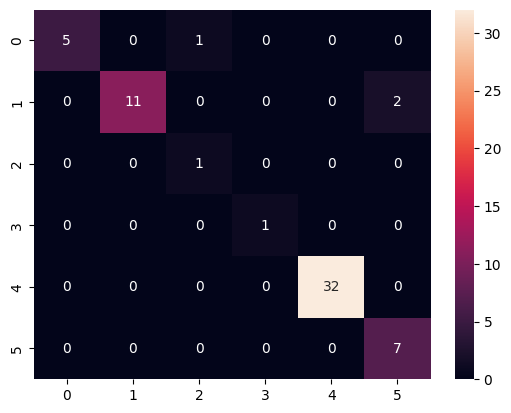

In [38]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot= True)

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
model.score(X_test,y_test)

0.95

In [43]:
model.predict([[30000, 274830, 1000, -7, 0, 1 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

In [44]:
pred_y = model.predict(X_test)

In [46]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.85      0.92        13
           2       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        32
           6       0.78      1.00      0.88         7

    accuracy                           0.95        60
   macro avg       0.88      0.95      0.89        60
weighted avg       0.97      0.95      0.95        60



<Axes: >

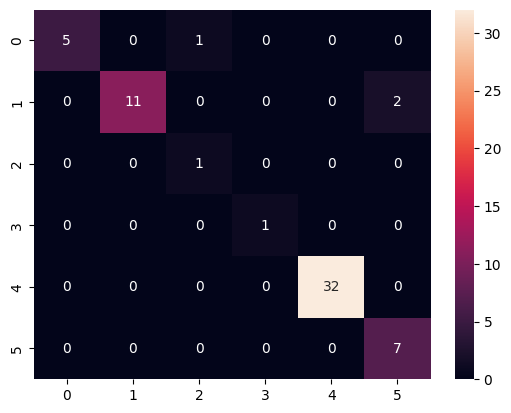

In [47]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot= True)